In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [32]:

y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [30]:
def plot_sample(X,y,index):

  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

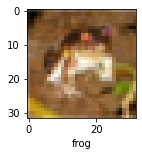

In [31]:
plot_sample(X_train,y_train,0)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
      ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8604 - accuracy: 0.3350
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6602 - accuracy: 0.4124
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5711 - accuracy: 0.4466
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5078 - accuracy: 0.4662
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4589 - accuracy: 0.4875


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.44      0.52      1000
           1       0.58      0.49      0.53      1000
           2       0.43      0.20      0.28      1000
           3       0.47      0.12      0.20      1000
           4       0.42      0.36      0.39      1000
           5       0.50      0.23      0.31      1000
           6       0.56      0.42      0.48      1000
           7       0.29      0.75      0.41      1000
           8       0.67      0.38      0.49      1000
           9       0.32      0.80      0.46      1000

    accuracy                           0.42     10000
   macro avg       0.49      0.42      0.41     10000
weighted avg       0.49      0.42      0.41     10000



In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4637 - accuracy: 0.4729
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1065 - accuracy: 0.6122
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9859 - accuracy: 0.6544
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9020 - accuracy: 0.6859
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8326 - accuracy: 0.7087
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7734 - accuracy: 0.7290
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7239 - accuracy: 0.7461
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6800 - accuracy: 0.7620
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6401 - accuracy: 0.7757
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.605

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2352 - accuracy: 0.6870


[1.235207438468933, 0.6869999766349792]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.4355582e-03, 1.7206427e-06, 1.3400789e-06, 9.7768241e-01,
        4.6741729e-08, 4.6387301e-03, 1.6058076e-02, 4.2901314e-07,
        1.8127688e-04, 4.1124230e-07],
       [2.4056445e-04, 1.8959820e-02, 7.0236644e-10, 1.2708362e-10,
        5.7205486e-12, 2.7378302e-17, 1.6463274e-12, 2.4653516e-16,
        9.8079932e-01, 2.4601559e-07],
       [6.4817065e-04, 5.9632868e-02, 6.2559011e-06, 1.5545238e-04,
        2.0433188e-06, 4.6121738e-08, 1.1761039e-06, 1.9986852e-07,
        9.3723476e-01, 2.3189755e-03],
       [6.0140890e-01, 3.6810303e-01, 1.1606623e-03, 2.9152001e-03,
        1.2272044e-05, 5.4139667e-07, 2.0081286e-06, 1.5332531e-03,
        2.4864115e-02, 5.7541612e-08],
       [7.5084987e-09, 7.7145266e-08, 3.4163345e-04, 1.4918158e-04,
        9.7067552e-03, 8.2743992e-07, 9.8980159e-01, 6.1629396e-10,
        3.6488139e-08, 3.4702342e-11]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

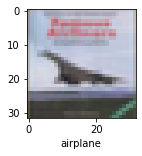

In [33]:
plot_sample(X_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

In [35]:

classes[y_classes[3]]

'airplane'